Epoch 0: Loss = 0.693334979958408
Epoch 100: Loss = 0.3073956864065102
Epoch 200: Loss = 0.2944016152531479
Epoch 300: Loss = 0.2925019712973209
Epoch 400: Loss = 0.2916625293364032
Epoch 500: Loss = 0.29106011089813666
Epoch 600: Loss = 0.2905642928720178
Epoch 700: Loss = 0.29014263571602433
Epoch 800: Loss = 0.2897797939069286
Epoch 900: Loss = 0.2894650429343431


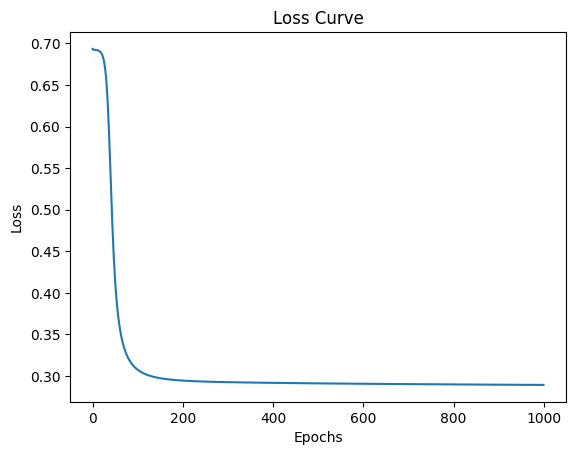

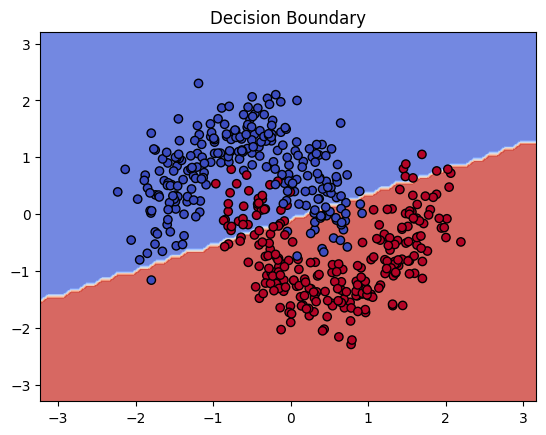

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class NeuralNetwork:
    def __init__(self, learning_rate=0.01, epochs=1000, hidden_layer_size=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_layer_size = hidden_layer_size
        self.losses = []

    def initialize_weights(self, input_size, output_size):
     
        self.weights_input_hidden = np.random.randn(input_size, self.hidden_layer_size) * 0.01
        self.bias_hidden = np.zeros((1, self.hidden_layer_size))
        self.weights_hidden_output = np.random.randn(self.hidden_layer_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def compute_loss(self, y, y_pred):

        return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_outputs = 1  
        self.initialize_weights(n_features, n_outputs)

        for epoch in range(self.epochs):

            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            y_pred = self.sigmoid(output_layer_input)


            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

          
            error_output_layer = y_pred - y
            delta_output_layer = error_output_layer * self.sigmoid_derivative(y_pred)

            error_hidden_layer = np.dot(delta_output_layer, self.weights_hidden_output.T)
            delta_hidden_layer = error_hidden_layer * self.sigmoid_derivative(hidden_layer_output)

         
            self.weights_hidden_output -= self.learning_rate * np.dot(hidden_layer_output.T, delta_output_layer)
            self.bias_output -= self.learning_rate * np.sum(delta_output_layer, axis=0, keepdims=True)

            self.weights_input_hidden -= self.learning_rate * np.dot(X.T, delta_hidden_layer)
            self.bias_hidden -= self.learning_rate * np.sum(delta_hidden_layer, axis=0, keepdims=True)

         
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        y_pred = self.sigmoid(output_layer_input)
        return (y_pred > 0.5).astype(int)


X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nn = NeuralNetwork(learning_rate=0.01, epochs=1000, hidden_layer_size=10)
nn.fit(X_train, y_train)


plt.plot(nn.losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor='k', cmap='coolwarm')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, nn)
